# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

***Loading Basic dataset***

In [2]:
training_dataset = pd.read_csv('F:\study\misc\Projects\Doctor Delhi\Training.csv')
test_dataset = pd.read_csv('F:\study\misc\Projects\Doctor Delhi\Testing.csv')

In [3]:
X = training_dataset.iloc[:, 0:132].values
y = training_dataset.iloc[:, -1].values
dimensionality_reduction = training_dataset.groupby(training_dataset['prognosis']).max()


***Preprocessing***

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

***Splitting dataset***

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

***Decision Tree Model***

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
cols     = training_dataset.columns
cols     = cols[:-1]

In [8]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols
from sklearn.tree import _tree

**Method to simulate the working of a Chatbot by extracting and formulating questions**

In [9]:
def execute_bot():

    print("Please reply with yes/Yes or no/No for the following symptoms") 
    def print_disease(node):
        #print(node)
        node = node[0]
        #print(len(node))
        val  = node.nonzero() 
        #print(val)
        disease = labelencoder.inverse_transform(val[0])
        return disease
    def tree_to_code(tree, feature_names):
        tree_ = tree.tree_
        #print(tree_)
        feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
        #print("def tree({}):".format(", ".join(feature_names)))
        symptoms_present = []
        def recurse(node, depth):
            indent = "  " * depth
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print(name + " ?")
                ans = input()
                ans = ans.lower()
                if ans == 'yes':
                    val = 1
                else:
                    val = 0
                if  val <= threshold:
                    recurse(tree_.children_left[node], depth + 1)
                else:
                    symptoms_present.append(name)
                    recurse(tree_.children_right[node], depth + 1)
            else:
                present_disease = print_disease(tree_.value[node])
                print( "You may have " +  present_disease )
                print()
                red_cols = dimensionality_reduction.columns 
                symptoms_given = red_cols[dimensionality_reduction.loc[present_disease].values[0].nonzero()]
                print("symptoms present  " + str(list(symptoms_present)))
                print()
                print("symptoms given "  +  str(list(symptoms_given)) )  
                print()
                confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
                print("confidence level is " + str(confidence_level))
                print()
                print('The model suggests:')
                print()
                row = doctors[doctors['disease'] == present_disease[0]]
                print('Consult ', str(row['name'].values))
                print()
                print('Visit ', str(row['link'].values))
                #print(present_disease[0])
                
    
        recurse(0, 1)
    
    tree_to_code(classifier,cols)

In [10]:
doc_dataset = pd.read_csv('F:\study\misc\Projects\Doctor Delhi\doctors_dataset.csv', names = ['Name', 'Description'])

In [11]:
diseases = dimensionality_reduction.index
diseases = pd.DataFrame(diseases)

doctors = pd.DataFrame()
doctors['name'] = np.nan
doctors['link'] = np.nan
doctors['disease'] = np.nan

doctors['disease'] = diseases['prognosis']


doctors['name'] = doc_dataset['Name']
doctors['link'] = doc_dataset['Description']

record = doctors[doctors['disease'] == 'AIDS']
doctors.head()

,name,link,disease
0,Dr. Amarpreet Singh Riar,https://www.practo.com/delhi/doctor/amarpreet-...,(vertigo) Paroymsal Positional Vertigo
1,Dr. (Maj.)Sharad Shrivastava,https://www.practo.com/delhi/doctor/dr-54-gene...,AIDS
2,Dr. Anirban Biswas,https://www.practo.com/delhi/doctor/anirban-bi...,Acne
3,Dr. Aman Vij,https://www.practo.com/delhi/doctor/dr-aman-vi...,Alcoholic hepatitis
4,Dr. Mansi Arya,https://www.practo.com/delhi/doctor/dr-mansi-a...,Allergy


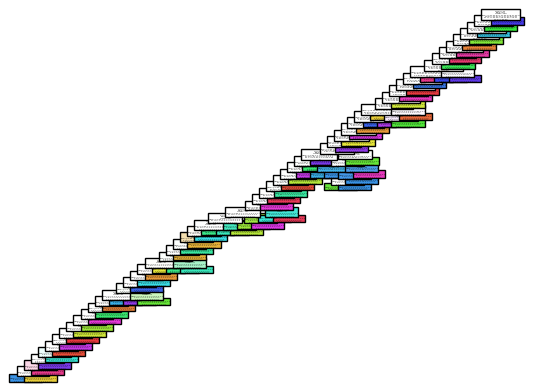

In [14]:
from sklearn.tree import  plot_tree
plot_tree(classifier, filled= True)
plt.show()

In [12]:
data_dict = {"model": classifier}
for col in training_dataset.columns:
    data_dict[str(col)] = col

In [13]:
import pickle
with open('saved_health_model.pkl', 'wb') as file:
    pickle.dump(data_dict, file)


In [14]:
execute_bot()

Please reply with yes/Yes or no/No for the following symptoms
slurred_speech ?
yes
['You may have Hypoglycemia']

symptoms present  ['slurred_speech']

symptoms given ['vomiting', 'fatigue', 'anxiety', 'sweating', 'headache', 'nausea', 'blurred_and_distorted_vision', 'excessive_hunger', 'drying_and_tingling_lips', 'slurred_speech', 'irritability', 'palpitations']

confidence level is 0.08333333333333333

The model suggests:

Consult  ['Dr. Jyoti Arora Monga']

Visit  ['https://www.practo.com/delhi/doctor/dr-jyoti-arora-ayurveda?specialization=Ayurveda&practice_id=693424']


**Naive Bayes Classifier**

In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [16]:
data_dict1 = {"model": clf}
data_dict1["encoder"] =labelencoder
data_dict1["dataset"] = doctors
for col in training_dataset.columns:
    data_dict1[str(col)] = col

In [17]:
with open('saved_health_model_nb.pkl', 'wb') as file1:
    pickle.dump(data_dict1, file1)

In [18]:
numbers = X_test.shape[1]

In [19]:
import random

In [20]:
randomLabel = np.array(np.random.randint(2, size=numbers)).reshape(1,-1)

In [21]:
value =clf.predict(randomLabel)

In [22]:
disease = labelencoder.inverse_transform(value)
disease[0]

array(['hepatitis A'], dtype=object)

In [24]:
disease[0]

'hepatitis A'

In [32]:
pre = (doctors.loc[doctors['disease'] == disease[0]])

In [39]:
pre

,name,link,disease
40,Dr. Gayatri Bala Juneja,https://www.practo.com/delhi/doctor/dr-gayatri...,hepatitis A
